In [47]:
% reload_ext autoreload
% autoreload 2
% matplotlib inline
from IPython import display

import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
import torchvision.models as models
import torch
from torch import nn
from torch.utils.data import DataLoader

import utils
import pipelines

C = utils.get_config('./config.ini')

# Artstyle

The collection of WikiArt paintings cropped to `224x224` at the centre. See `MNIST.ipynb` for introduction.

In [44]:
traindata = pipelines.cropped.Data(root=C.paths.root, info_csv=C.paths.train_csv, train=True)

print('{} Instances. {} Classes'.format(len(traindata), len(traindata.encoder.classes_)))

79433 Instances. 136 Classes


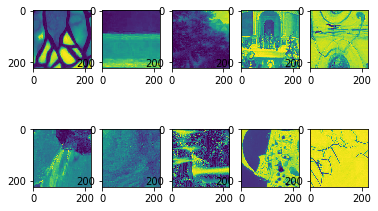

In [49]:
fig, (row1, row2) = plt.subplots(nrows=2, ncols=5)
for i, ax in enumerate((*row1, *row2)):
    x, y = traindata[4470+i]  # x.shape == (1, 28, 28), y.shape == (1,)
    ax.imshow(x[0])

#for i, (x,y) in enumerate(traindata):
#    if x.shape[0] != 3:
#        print('Removing image ' + str(i))
#        #del traindata[i]
#        #print('Converting image ' + str(i) + ' to 3 channel')

In [45]:
EPOCHS = 1
BATCH_SIZE = 10
LRATE = 1e-3
MOMENTUM = 0.9
USE_CUDA = True

net = models.alexnet(pretrained=True)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=LRATE, momentum=MOMENTUM)

model = pipelines.cropped.Model(net=net, criterion=criterion, optimizer=optimizer, cuda=USE_CUDA)

In [48]:
model.train(dataset=traindata, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch # 0
Min-batch #  100	 Loss: 0.347
Min-batch #  200	 Loss: 0.342
Min-batch #  300	 Loss: 0.332
Min-batch #  400	 Loss: 0.333
Min-batch #  500	 Loss: 0.316
Min-batch #  600	 Loss: 0.326
Min-batch #  700	 Loss: 0.325
Min-batch #  800	 Loss: 0.330
Min-batch #  900	 Loss: 0.335
Min-batch # 1000	 Loss: 0.319
Min-batch # 1100	 Loss: 0.319
Min-batch # 1200	 Loss: 0.317
Min-batch # 1300	 Loss: 0.323
Min-batch # 1400	 Loss: 0.322
Min-batch # 1500	 Loss: 0.331
Min-batch # 1600	 Loss: 0.322
Min-batch # 1700	 Loss: 0.321
Min-batch # 1800	 Loss: 0.317
Min-batch # 1900	 Loss: 0.315
Min-batch # 2000	 Loss: 0.324
Min-batch # 2100	 Loss: 0.331
Min-batch # 2200	 Loss: 0.318
Min-batch # 2300	 Loss: 0.319
Min-batch # 2400	 Loss: 0.324
Min-batch # 2500	 Loss: 0.312
Min-batch # 2600	 Loss: 0.313
Min-batch # 2700	 Loss: 0.321
Min-batch # 2800	 Loss: 0.314
Min-batch # 2900	 Loss: 0.317
Min-batch # 3000	 Loss: 0.315
Min-batch # 3100	 Loss: 0.312
Min-batch # 3200	 Loss: 0.318
Min-batch # 3300	 Loss: 0.313
